In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [178]:
def calculate_mass(d):
    m = []
    for x in d: 
        m_x = np.float32(x*1000*np.pi*(4/3)*(1)**3) + 0.3*42
        m.append("%.2f" % m_x)
    return m


def calculate_newton(d):
    n = []
    for x in d: 
        n_x = np.float32(x*1000*np.pi*(4/3)*(1**3) + 0.3*42)*9.81 # sum of cell mass and cloth mass
        n.append("%.2f" % n_x)
    return n

calculate_newton(density)

['123.61', '20669.62', '41215.64', '61761.65', '82307.67']

Text(0.5, 0, 'cell mass $[kg]$')

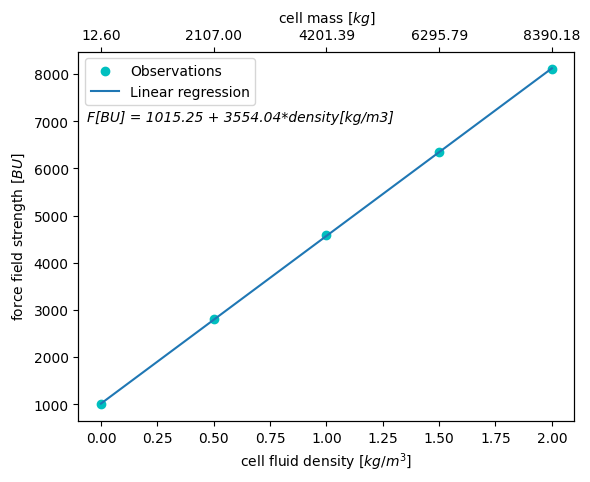

In [173]:
# relationship between mass and force field strength (in Blender units - BU)

#mass_cell = 4188.7 # in kg
density = [0,0.5,1,1.5,2]
strength = [1000, 2804,4580.2,6350.3,8111.94]
#mass = [0,mass_cell/2,mass_cell, mass_cell*2]

fig = plt.figure()
ax1 = fig.add_subplot(111)

model = np.polyfit(density, strength, deg=1)
equation = f'F[BU] = {"%.2f" % model[1]} + {"%.2f" % model[0]}*density[kg/m3]'
predict = np.poly1d(model)

density_reg = np.arange(0,2.01,0.01)
strength_reg = predict(density_reg)
ax1.scatter(density, strength, color = 'c')
ax1.plot(density_reg, strength_reg)
ax1.text(-0.06, 7000, equation, style='italic')
ax1.legend(['Observations', 'Linear regression'])
ax1.set_xlabel(r"cell fluid density $[kg/m^3]$")
ax1.set_ylabel(r"force field strength $[BU]$")

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(density)
ax2.set_xticklabels(calculate_mass(density))
ax2.set_xlabel(r"cell mass $[kg]$")

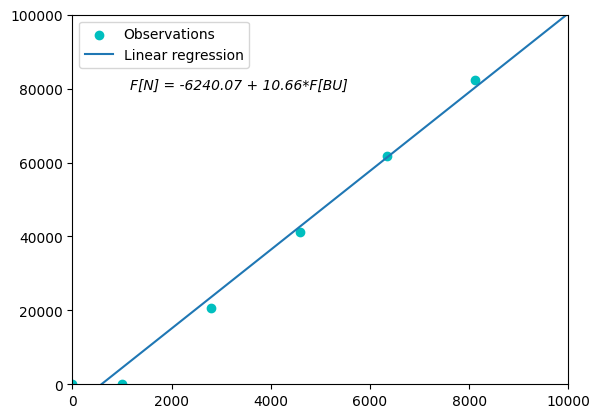

In [189]:
# relationship between force field strength [BU] and adhesion forces strength [N]

#newtons = [0,20546,41090,82184]
#newtons = calculate_newton(density)
#newtons = [0.00, 2094.40, 4188.79, 6283.19, 8377.58]
newtons = [0, 123.61, 20669.62, 41215.64, 61761.65, 82307.67]
strength = [0, 1000, 2804, 4580.2, 6350.3, 8111.94]

fig = plt.figure()
ax1 = fig.add_subplot(111)

model = np.polyfit(strength, newtons, deg=1)
equation = f'F[N] = {"%.2f" % model[1]} + {"%.2f" % model[0]}*F[BU]'
predict = np.poly1d(model)

density_reg = range(0, 10000)
strength_reg = predict(density_reg)

plt.xlim([0, 10000])
plt.ylim([0, 100000])

ax1.scatter(strength, newtons, color = 'c')
ax1.plot(density_reg, strength_reg)
ax1.text(1160, 80000, equation, style='italic')
ax1.legend(['Observations', 'Linear regression'])        